<a href="https://colab.research.google.com/github/Gabriel2295/AAUTOS/blob/main/Copia_de_Copia_de_CODE_Arboles_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase: I.A. 2022**

Autor: Luis Vidal V. (lvidal@uach.cl)

Fecha: 06 de Octubre de 2022

Notas: 
- Los ejemplos se ejecutan en lenguaje R 
- Se desarrolla el concepto de árboles de decisión

# **Árboles de Decisión**

Un árbol de decisión es un diagrama de flujo, donde:
- Cada **nodo interno** representa una "pregunta" sobre un atributo
- Cada **rama** representa una respuesta a esa pregunta y
- Cada **hoja o nodo terminal** representa la clase de clasificación

# **1. Caso: Detectar enfermedad**

Se cuenta con información de 146 pacientes con cáncer de próstata en estado C.

Medicamente es interesante estudiar si la enfermedad reaparece luego de la cirugía de remoción de la próstata y el intervalo de tiempo hasta que eso ocurra (si es que ocurre).


Los datos se encuentran bajo el nombre de stagec de la librería rpart.

Se aplican las funciones rpart, printcp y prune de la librería rpart.

In [1]:
# Cargar paquete rpart antes
library(rpart) 
data(stagec)
head(stagec)

,pgtime,pgstat,age,eet,g2,grade,gleason,ploidy
,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,6.1,0,64,2,10.26,2,4,diploid
2,9.4,0,62,1,NA,3,8,aneuploid
3,5.2,1,59,2,9.99,3,7,diploid
4,3.2,1,62,2,3.57,2,4,diploid
5,1.9,1,64,2,22.56,4,8,tetraploid
6,4.8,0,69,1,6.14,3,7,diploid


In [ ]:
# Le pedimos los nombres de las columnas
# de la base o también  llamadas variables.
names(stagec)

[1] "pgtime"  "pgstat"  "age"     "eet"     "g2"      "grade"   "gleason"
[8] "ploidy"

In [ ]:
help(stagec)

In [ ]:
# En esta parte convertimos los 0's y 1's en labels con palabras. 
# Si el cáncer esta progesando dirá "prog",
#     sino aparecerá un "No".

progstat <- factor(stagec$pgstat, levels=0:1,labels=c("No", "Prog"))

In [ ]:
progstat

[1] No   No   Prog Prog Prog No   No   No   Prog No   No   Prog Prog No   Prog
 [16] Prog No   No   No   No   No   Prog No   Prog Prog Prog Prog No   Prog No  
 [31] Prog No   No   No   No   No   No   Prog Prog Prog No   Prog No   No   No  
 [46] No   No   No   No   No   No   No   No   No   Prog Prog No   No   No   Prog
 [61] Prog No   Prog No   No   Prog No   No   No   No   No   Prog No   Prog No  
 [76] Prog Prog No   Prog No   Prog Prog No   Prog Prog No   No   Prog No   Prog
 [91] No   No   No   Prog Prog Prog No   No   No   No   No   Prog Prog No   Prog
[106] No   Prog No   Prog Prog Prog No   No   No   Prog No   No   No   No   No  
[121] No   No   Prog Prog No   Prog No   No   Prog No   Prog No   No   No   No  
[136] No   No   No   No   No   No   No   Prog No   No   Prog
Levels: No Prog

In [ ]:
#Creación del árbol
#genera el árbol de decisiones utilizando todas las variables

cfit <- rpart(progstat ~ age + eet + g2 + grade +
gleason + ploidy,data=stagec, method="class")

Visualización del árbol
estas cuatro líneas juntas crean la visualización del árbol.

En el árbol, en cada nodo se ve la pregunta donde se genera el corte:
- El lado izquierdo es respuesta Si (a la pregunta).
- El lado derecho es respuesta No.

Por Ej: una persona con grade =1,4 se iría por la rama izquierda y si progstat=No.

n= 146 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 146 54 No (0.6301370 0.3698630)  
   2) grade< 2.5 61  9 No (0.8524590 0.1475410) *
   3) grade>=2.5 85 40 Prog (0.4705882 0.5294118)  
     6) g2< 13.2 40 17 No (0.5750000 0.4250000)  
      12) ploidy=diploid,tetraploid 31 11 No (0.6451613 0.3548387)  
        24) g2>=11.845 7  1 No (0.8571429 0.1428571) *
        25) g2< 11.845 24 10 No (0.5833333 0.4166667)  
          50) g2< 11.005 17  5 No (0.7058824 0.2941176) *
          51) g2>=11.005 7  2 Prog (0.2857143 0.7142857) *
      13) ploidy=aneuploid 9  3 Prog (0.3333333 0.6666667) *
     7) g2>=13.2 45 17 Prog (0.3777778 0.6222222)  
      14) g2>=17.91 22  8 No (0.6363636 0.3636364)  
        28) age>=62.5 15  4 No (0.7333333 0.2666667) *
        29) age< 62.5 7  3 Prog (0.4285714 0.5714286) *
      15) g2< 17.91 23  3 Prog (0.1304348 0.8695652) *


Classification tree:
rpart(formula = progstat ~ age + eet + g2 + grade + gleason + 
    ploidy, data = stagec, method = "class")

Variables actually used in tree construction:
[1] age    g2     grade  ploidy

Root node error: 54/146 = 0.36986

n= 146 

        CP nsplit rel error xerror    xstd
1 0.104938      0   1.00000 1.0000 0.10802
2 0.055556      3   0.68519 1.0741 0.10949
3 0.027778      4   0.62963 1.0000 0.10802
4 0.018519      6   0.57407 1.0185 0.10843
5 0.010000      7   0.55556 1.0185 0.10843


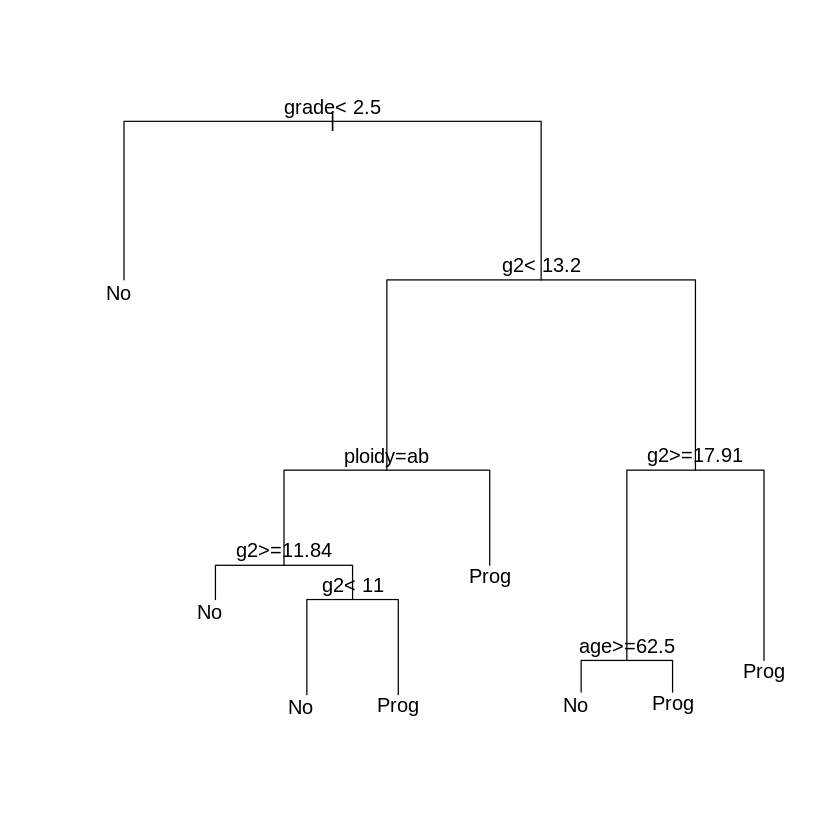

In [ ]:
#Visualización del árbol
cfit
plot(cfit) 
text(cfit)
printcp(cfit)

# **2. Caso: Vinos**

Fuente ejemplo: https://rpubs.com/jboscomendoza/arboles_decision_clasificacion


Notas: se han modificado comandos y repositorio, pero escencialmente es el mismo ejemplo.

In [2]:
library(rpart) 	#Instalar previamente.

**Descarga Archivo desde repositorio GITHUB**

In [3]:
download.file('https://raw.githubusercontent.com/Gabriel2295/datosfine/main/DATAUTO.csv', destfile = "DATAUTO.csv", method = "wget")

**Cargar datos desde un archivo**

sep="," tenga cuidado en el separador, los decimales en este ejemplo se separan por . y no ,

In [4]:

datos <- read.table("DATAUTO.csv",header=TRUE, sep=";")
attach(datos)

In [5]:

#names(datos)	
#head(datos)
#View(datos)

**Creación del árbol**

In [8]:
#target
datos_analisis <- factor(datos$V2)

#Genera el arbol de desiciones utilizando todas las variables
cfit <- rpart(datos_analisis ~ V1+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13, data=datos, method="class")

**Visualización del Árbol**

n= 25 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 25 22 1,4 (0.04 0.04 0.08 0.04 0.08 0.12 0.08 0.08 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04)  
  2) V1=2,8,3,3,4,7,5,1,5,3,6 7  4 1,4 (0 0 0.29 0 0.29 0.43 0 0 0 0 0 0 0 0 0 0 0 0 0) *
  3) V1=1,3,1,8,1,9,2,4,2,7,3,3,2,3,4,3,7,3,9,4,4,1,4,6,4,9,5,5 18 16 1,5 (0.056 0.056 0 0.056 0 0 0.11 0.11 0.056 0.056 0.056 0.056 0.056 0.056 0.056 0.056 0.056 0.056 0.056) *

Classification tree:
rpart(formula = datos_analisis ~ V1 + V3 + V4 + V5 + V6 + V7 + 
    V8 + V9 + V10 + V11 + V12 + V13, data = datos, method = "class")

Variables actually used in tree construction:
[1] V1

Root node error: 22/25 = 0.88

n= 25 

        CP nsplit rel error xerror xstd
1 0.090909      0   1.00000 1.1364    0
2 0.010000      1   0.90909 1.1364    0


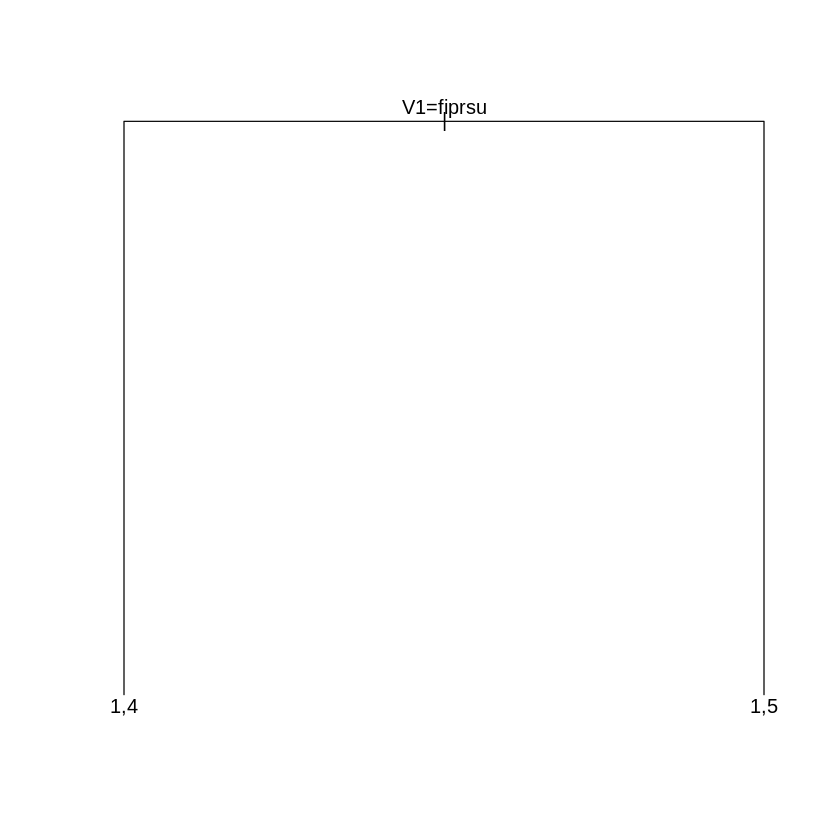

In [9]:
# Estas cuatro lineas juntas crean la visualización del Árbol.
# En el arbol, en cada nodo se ve la pregunta donde se genera el corte:
# - El lado izquierdo es respues Si (a la pregunta).
# - El lado derecho es respuesta No.
print(cfit)
plot(cfit) 
text(cfit)
printcp(cfit)

# **Tarea**

Emplear el código anterior (vinos), para crear un caso que emplee un árbol de decisión, debe almacenar sus datos en GITHUB, por lo que debera crear su propia cuenta.

Deberá construir su probia base de información, definir variables y variable target, luego crear arbol de decisión, graficar e implementar una herramienta de decisión en excel con esta información.

